### Import dependencies

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import os
import matplotlib.pyplot as plt


### Setup

In [112]:
def path_to_symbols(base_dir="data"):
    """Return a list of symbols from a directory by removing the file extension `csv`."""
    file_list = os.listdir(base_dir)
    res =[]

    for file in file_list:
        file = file.split('.')
        if file[1] =="csv":
            res.append(file[0])
    return res
        
def symbol_to_path(symbol, base_dir= "data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_container = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv("data/" + symbol + ".csv", index_col= "Date", parse_dates= True, usecols=['Date', 'Adj Close'], na_values="nan")
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df_container = df_container.join(df_temp)
    
    df_container=df_container.dropna();

    return df_container

def plot_data(df:pd.DataFrame, title= "Stock prices"):
    """Plot stocks"""

    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
def normalise_data(df:pd.DataFrame, frame_of_reference= 0):
    """Normalises the data based on the frame of reference"""
    return df/df.iloc[frame_of_reference]

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-30')

    # Choose stock symbols to read
    symbols = path_to_symbols()
    
    # Get stock data
    df = get_data(symbols, dates)
    df = normalise_data(df)
    plot_data(df)


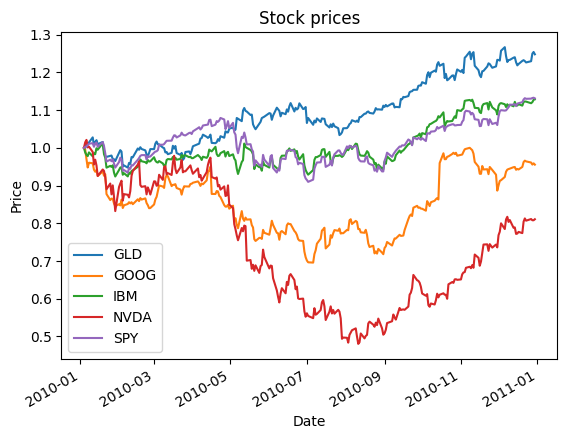

In [113]:
if __name__ == '__main__':
    test_run()


### Feature engineering